In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [34]:
df1 = pd.read_csv('churn_train.csv')



,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0


In [35]:
from datetime import datetime
def active_flag(df, last_trip_date_columns):
   # calucate preceding data
   df['pulled_data'] = datetime.strptime('2014-6-1', "%Y-%m-%d") # temp pulled_data columns
   df['preceding_data'] = df['pulled_data'] - pd.to_datetime(df[last_trip_date_columns])
   df['preceding_data'] = df['preceding_data'].astype(str).str[:-24].astype(int)


   # if active or not
   df['active_flag'] = np.where(df['preceding_data'] <= 30, 1, 0)

   # drop temp columns
   df.drop('pulled_data',axis=1)

active_flag(df1,'last_trip_date')


In [40]:
df1.drop(['pulled_data','phone','city'], axis=1, inplace=True)

In [44]:
df1.drop(['signup_date'], axis=1, inplace=True)

In [46]:
df1.drop(['last_trip_date'], axis=1, inplace=True)

In [49]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,preceding_data,active_flag
0,6.94,5.0,5.0,1.00,0.0,0,False,100.0,29,1
1,8.06,5.0,5.0,1.00,0.0,2,True,0.0,126,0
2,21.50,4.0,NaN,1.00,0.0,1,True,100.0,11,1
3,9.46,5.0,NaN,2.75,100.0,1,False,100.0,142,0
4,13.77,5.0,NaN,1.00,0.0,0,False,100.0,19,1


In [54]:
df1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,preceding_data,active_flag
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,42.768575,0.524375
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619,61.794023,0.499412
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-30.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,-16.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,24.000000,1.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,107.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,151.000000,1.000000


In [56]:
df1.fillna(df1.mean(), inplace=True)

In [59]:
plotting.scatter_matrix(df1,figsize=(15,15))

NameError: name 'plotting' is not defined

In [60]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,preceding_data,active_flag
0,6.94,5.0,5.000000,1.00,0.0,0,False,100.0,29,1
1,8.06,5.0,5.000000,1.00,0.0,2,True,0.0,126,0
2,21.50,4.0,4.601697,1.00,0.0,1,True,100.0,11,1
3,9.46,5.0,4.601697,2.75,100.0,1,False,100.0,142,0
4,13.77,5.0,4.601697,1.00,0.0,0,False,100.0,19,1


In [64]:
df1["luxury_car_user"] *= 1

In [65]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,preceding_data,active_flag
0,6.94,5.0,5.000000,1.00,0.0,0,0,100.0,29,1
1,8.06,5.0,5.000000,1.00,0.0,2,1,0.0,126,0
2,21.50,4.0,4.601697,1.00,0.0,1,1,100.0,11,1
3,9.46,5.0,4.601697,2.75,100.0,1,0,100.0,142,0
4,13.77,5.0,4.601697,1.00,0.0,0,0,100.0,19,1


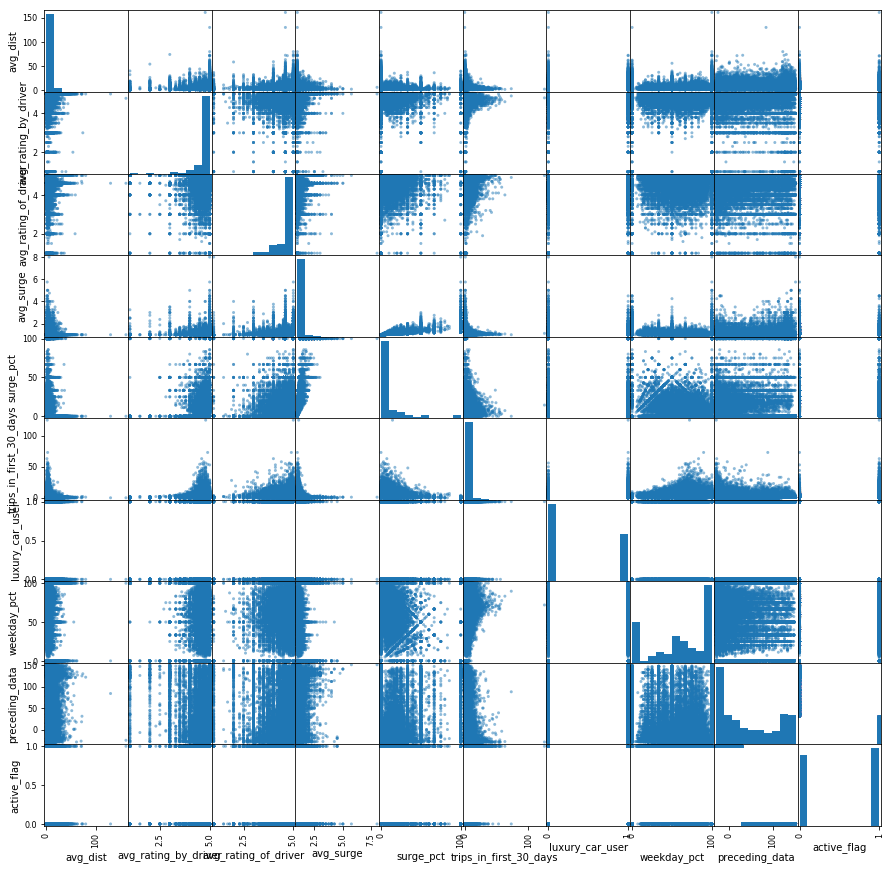

In [69]:
pd.plotting.scatter_matrix(df1, figsize=(15,15))
None

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null int64
weekday_pct               40000 non-null float64
preceding_data            40000 non-null int64
active_flag               40000 non-null int64
dtypes: float64(6), int64(4)
memory usage: 3.1 MB


In [75]:
X = df1.iloc[:,:9]
y = df1.iloc[:,9:]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [78]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
base_test = model.predict(X_test)
# accuracy of test set
model.score(X_test, y_test)
model.feature_importances_

/home/newton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/newton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([7.93419932e-04, 1.45094441e-02, 2.33481007e-04, 1.50300004e-02,
       3.02461216e-02, 5.68720086e-03, 8.07333600e-04, 9.58153027e-03,
       9.23111468e-01])

In [87]:
# Remove the preceding_data varable variable
X = df1.iloc[:,:8]
y = df1.iloc[:,9:]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [88]:
# remake the model
model = RandomForestClassifier()
model.fit(X_train,y_train)
base_test = model.predict(X_test)
# accuracy of test set
model.score(X_test, y_test)


/home/newton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/newton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7127

In [83]:
model.feature_importances_

array([0.38384157, 0.11270961, 0.07198242, 0.05982159, 0.06559706,
       0.13642356, 0.01984746, 0.14977674])

In [100]:
X.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,0.376150,60.874382
std,5.708056,0.447180,0.562407,0.222427,20.014008,3.811289,0.484424,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,0.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,1.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.000000,100.000000


Looks like variables 1,2,6 and 8 influence the model most.
#1 avg_dist - between 0 and 20
#2 avg_rating_by_driver - mostly between 4.5 and 5.0
#6 trips in first 30 days - mostly between 0 and 12
#8 weekday_pct - between 0 and 100

(array([ 7402.,   398.,  1259.,  1945.,  1630.,  4882.,  3825.,  2624.,
         2106., 13929.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

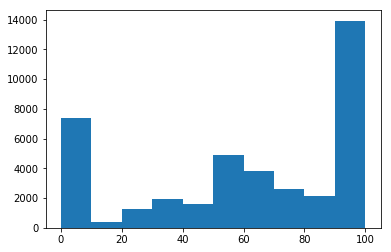

In [98]:
plt.hist(X['weekday_pct'])


tuning the model


In [107]:
random_forest_grid = {'max_depth': [None],
                      'max_features': ['sqrt'],
                      'min_samples_split': [2],
                      'min_samples_leaf': [4],
                      'bootstrap': [True],
                      'n_estimators': [40],
                      'random_state': [1]}


rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')

rf_gridsearch.fit(X_train, y_train)
best_rf_model = rf_gridsearch.best_estimator_
print ("best rf_model: {}".format(best_rf_model))

/home/newton/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 211 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 461 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.1min finished
/home/newton/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best rf_model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


In [110]:
#Load in raw data
df_train = pd.read_csv('churn_train.csv')
df_test = pd.read_csv('churn_test.csv')


In [112]:
#Clean the train data
def active_flag(df, last_trip_date_columns):
    # calucate preceding data
    df['pulled_data'] = datetime.strptime('2014-7-1', "%Y-%m-%d") # temp pulled_data columns
    df['preceding_data'] = df['pulled_data'] - pd.to_datetime(df[last_trip_date_columns])
    df['preceding_data'] = df['preceding_data'].astype(str).str[:-24].astype(int)
    
    
    # if active or not
    df['active_flag'] = np.where(df['preceding_data'] <= 30, 1, 0)
    
    # drop temp columns
    df.drop('pulled_data',axis=1, inplace=True)


In [113]:
df_train.head(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.0,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.0,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0


In [138]:
# clean the data
last_trip_date_columns = 'last_trip_date'
active_flag(df_train, last_trip_date_columns)
active_flag(df_test, last_trip_date_columns)

In [141]:
df_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,pulled_data,preceding_data,active_flag,signup_period
0,6.94,5.0,5.0,1.00,2,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,2014-07-01,59,0,170
1,8.06,5.0,5.0,1.00,2,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,2014-07-01,156,0,157
2,21.50,4.0,NaN,1.00,3,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,2014-07-01,41,0,180
3,9.46,5.0,NaN,2.75,3,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,2014-07-01,172,0,173
4,13.77,5.0,NaN,1.00,3,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,2014-07-01,49,0,151


In [116]:
def signup_period(df, signup_date):
    # calucate preceding data
    df['signup_period'] = df['pulled_data'] - pd.to_datetime(df[signup_date])
    df['signup_period'] = df['signup_period'].astype(str).str[:-24].astype(int)

    

In [120]:
signup_period(df_train,'signup_date')
signup_period(df_test,'signup_date')

drop unimportant columns

In [142]:
def drop_data(df, drop_columns, axis=1):
    return df.drop(drop_columns,axis)

drop_columns = ['pulled_data', 'last_trip_date','signup_date','phone']

In [143]:
df_train2 = drop_data(df_train, drop_columns)
df_test2 = drop_data(df_test, drop_columns)


In [144]:
#Handle city column
df_train2.replace("King's Landing", 1, inplace=True)
df_train2.replace("Astapor", 2, inplace=True)
df_train2.replace("Winterfell", 3, inplace=True)
df_test2.replace("King's Landing", 1, inplace=True)
df_test2.replace("Astapor", 2, inplace=True)
df_test2.replace("Winterfell", 3, inplace=True)

In [145]:
#Handle nans
df_train_final = df_train2.fillna(df_train.mean())
df_test_final = df_test2.fillna(df_test.mean())

In [146]:
#Handle true/false column
df_train_final["luxury_car_user"] *= 1
df_test_final["luxury_car_user"] *= 1

In [148]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null int64
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null int64
weekday_pct               40000 non-null float64
preceding_data            40000 non-null int64
active_flag               40000 non-null int64
signup_period             40000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 3.7 MB


In [159]:
X = df_train_final.drop(['active_flag'], axis=1)
y = df_train_final['active_flag']
X_test = df_test_final.drop(['active_flag'], axis=1)
y_test = df_test_final['active_flag']
X.drop(['preceding_data'],axis=1, inplace=True)
X_test.drop(['preceding_data'], axis=1, inplace=True)

In [160]:
#Now the mnodel
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}


rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')

rf_gridsearch.fit(X, y)
best_rf_model = rf_gridsearch.best_estimator_
print ("best rf_model: {}".format(best_rf_model))


Fitting 3 folds for each of 288 candidates, totalling 864 fits


/home/newton/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.4min finished


best rf_model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


In [157]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,preceding_data,signup_period
0,6.94,5.0,5.000000,1.00,2,0.0,0,0,100.0,59,170
1,8.06,5.0,5.000000,1.00,2,0.0,2,1,0.0,156,157
2,21.50,4.0,4.601697,1.00,3,0.0,1,1,100.0,41,180
3,9.46,5.0,4.601697,2.75,3,100.0,1,0,100.0,172,173
4,13.77,5.0,4.601697,1.00,3,0.0,0,0,100.0,49,151


In [163]:
random_forest_grid_2 = {'max_depth': [None],
                      'max_features': ['sqrt'],
                      'min_samples_split': [2],
                      'min_samples_leaf': [4],
                      'bootstrap': [True],
                      'n_estimators': [80],
                      'random_state': [1]}


rf_gridsearch_2 = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid_2,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')

rf_gridsearch_2.fit(X, y)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


/home/newton/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None], 'max_features': ['sqrt'], 'min_samples_split': [2], 'min_samples_leaf': [4], 'bootstrap': [True], 'n_estimators': [80], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=True)

In [172]:

r2 = RandomForestClassifier(max_depth=None,max_features='sqrt',min_samples_split=2,
                           min_samples_leaf=4,bootstrap=True,n_estimators=80,
                            random_state=1)
r2.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [175]:
base_test = r2.predict(X_test)
# accuracy of test set
r2.score(X_test, y_test)

0.7705

In [177]:
print(r2.feature_importances_)


[0.13941668 0.14999281 0.0553585  0.07976889 0.11667072 0.10647196
 0.07019816 0.04937712 0.14067693 0.09206822]


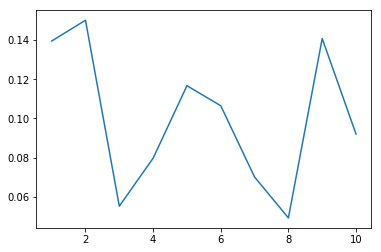

In [180]:
plt.plot(range(1,11), r2.feature_importances_)

In [178]:
X_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_period
0,2.48,5.0,5.000000,1.0,3,0.0,2,1,100.0,176
1,10.81,5.0,5.000000,1.0,3,0.0,3,1,100.0,176
2,12.95,5.0,5.000000,1.0,2,0.0,1,1,100.0,163
3,3.92,5.0,4.601011,1.0,3,0.0,0,0,0.0,173
4,1.46,5.0,4.500000,1.0,2,0.0,2,0,100.0,175
